<h1>Insurance Claim<h1>

<h2> Loading the dataset</h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("insurance2.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


<h2> Data Preprocessing</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
df.notnull().sum()

age               1338
sex               1338
bmi               1338
children          1338
smoker            1338
region            1338
charges           1338
insuranceclaim    1338
dtype: int64

<h2> Explonatory Data Analysis(EDA)</h2>

Class Distribution:
1    783
0    555
Name: insuranceclaim, dtype: int64


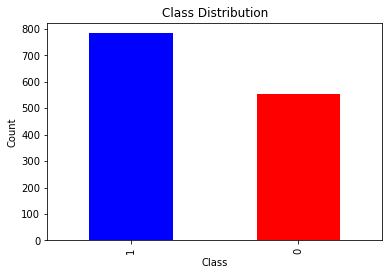

In [9]:
import matplotlib.pyplot as plt

class_distribution = df['insuranceclaim'].value_counts()


print("Class Distribution:")
print(class_distribution)
colors = ['blue', 'red']

class_distribution.plot(kind='bar', title='Class Distribution', color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


We can observe 778 people claimed the insurance.<br>
1 indicates that the insurance is claimed<br>
0 indicates that the insurance is not claimed

                               Visualising Categorical Features:                                


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

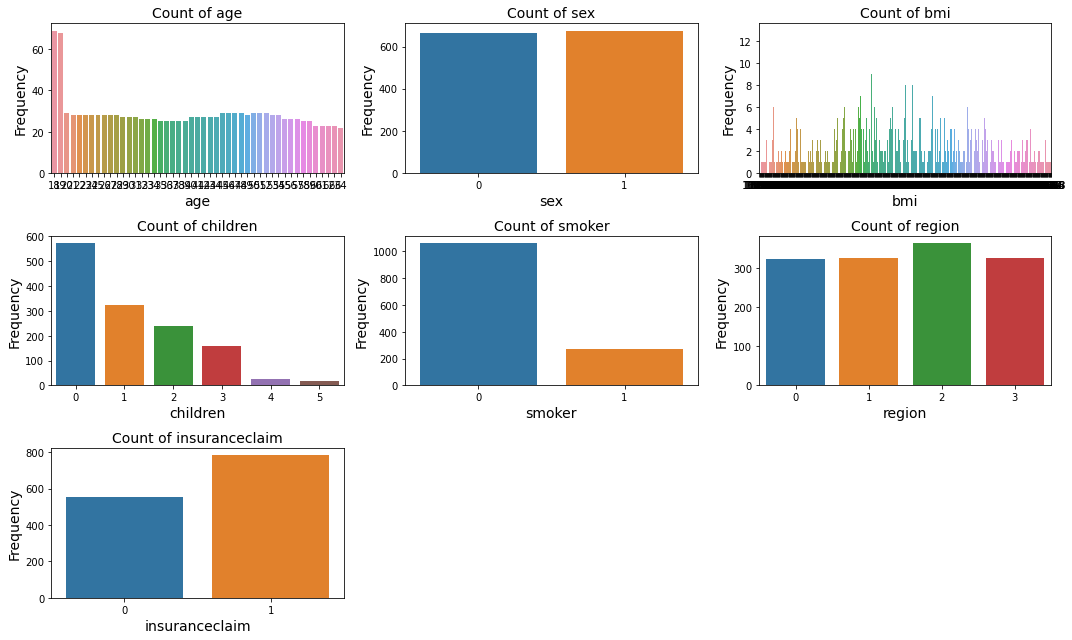

In [10]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical features
categorical_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'insuranceclaim']

print('\033[1mVisualising Categorical Features:'.center(100))

n = 3
plt.figure(figsize=[15, 3 * math.ceil(len(categorical_features) / n)])

for i in range(len(categorical_features)):
    plt.subplot(math.ceil(len(categorical_features) / n), n, i + 1)
    sns.countplot(df[categorical_features[i]])
    plt.xlabel(categorical_features[i], size=14)
    plt.ylabel('Frequency', size=14)
    plt.title('Count of ' + categorical_features[i], size=14)

plt.tight_layout()
plt.show()


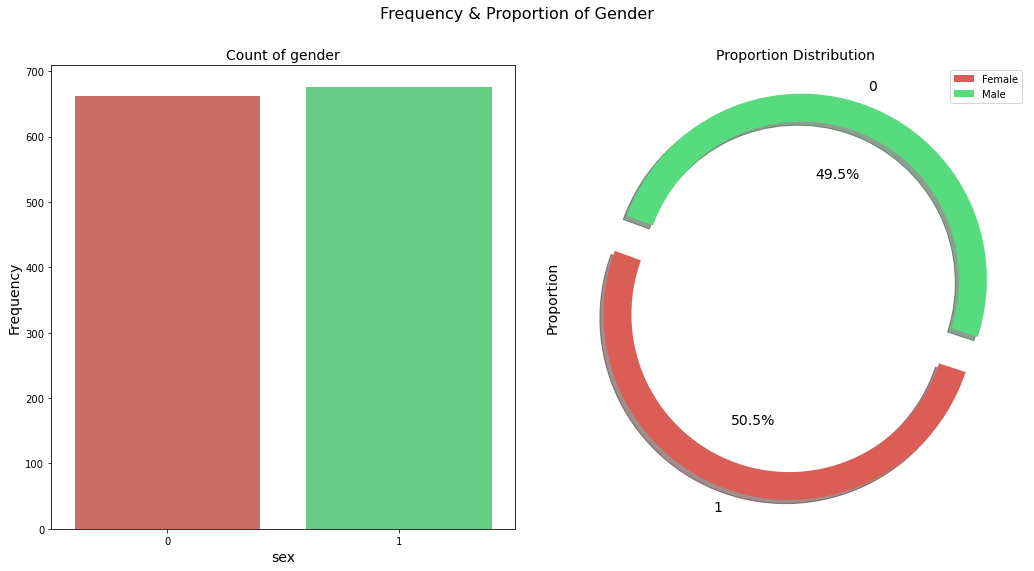

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=[15, 8])

plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df, palette=['#DB5E56', '#56DB7F'])
plt.xlabel(xlabel='sex', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label='Count of gender', size=14)

plt.subplot(1, 2, 2)
space = np.ones(2) / 10
df['sex'].value_counts().plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15),
                               shadow=True, startangle=160, figsize=[15, 8], legend=True,
                               colors=['#DB5E56', '#56DB7F'])
plt.legend(['Female', 'Male'])
plt.ylabel(ylabel='Proportion', size=14)
plt.title(label='Proportion Distribution', size=14)
plt.tight_layout(pad=3.0)
plt.suptitle(t='Frequency & Proportion of Gender', y=1.02, size=16)
plt.show()


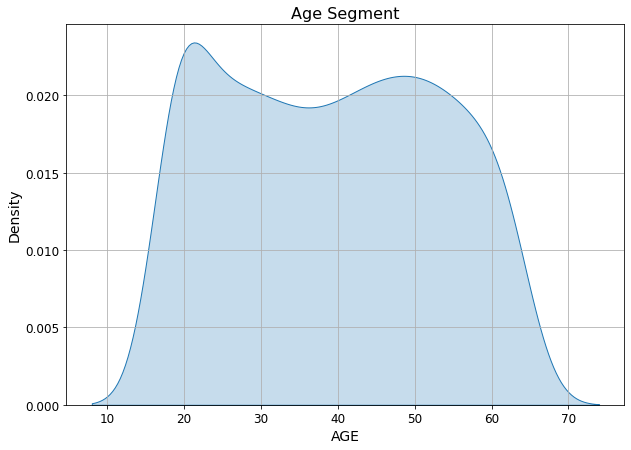

In [12]:
  fig = plt.figure(figsize=(10, 7))

  sns.kdeplot(x = (df['age']), shade=True)

  plt.xlabel(xlabel='AGE', size=14)
  plt.ylabel(ylabel='Density', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Age Segment', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

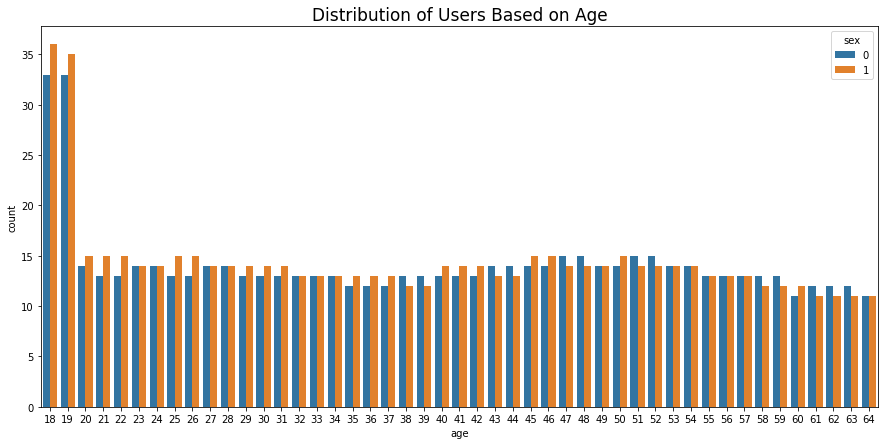

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=[15, 7])
sns.countplot(data=df, x="age", hue="sex")
plt.title("Distribution of Users Based on Age", size=17)
plt.show()


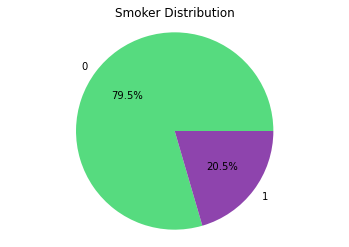

In [14]:
plt.title('Smoker Distribution')
smoker_count = df['smoker'].value_counts()
plt.pie(smoker_count, labels=smoker_count.index, autopct='%.1f%%',colors = ['#56DB7F','#8e44ad'])
plt.axis('equal')
plt.show()

NameError: name 'height' is not defined

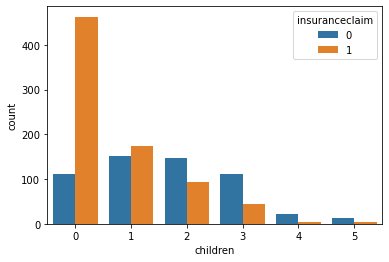

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='children', hue='insuranceclaim')

for bars in ax.containers:
    for bar in bars:
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.show()


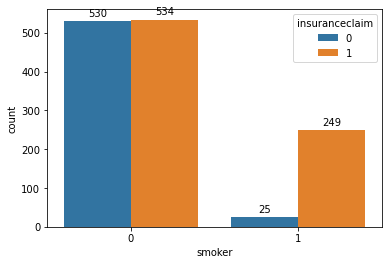

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ay = sns.countplot(data=df, x='smoker', hue='insuranceclaim')

for bars in ay.containers:
    for bar in bars:
        height = bar.get_height()
        ay.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.show()


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


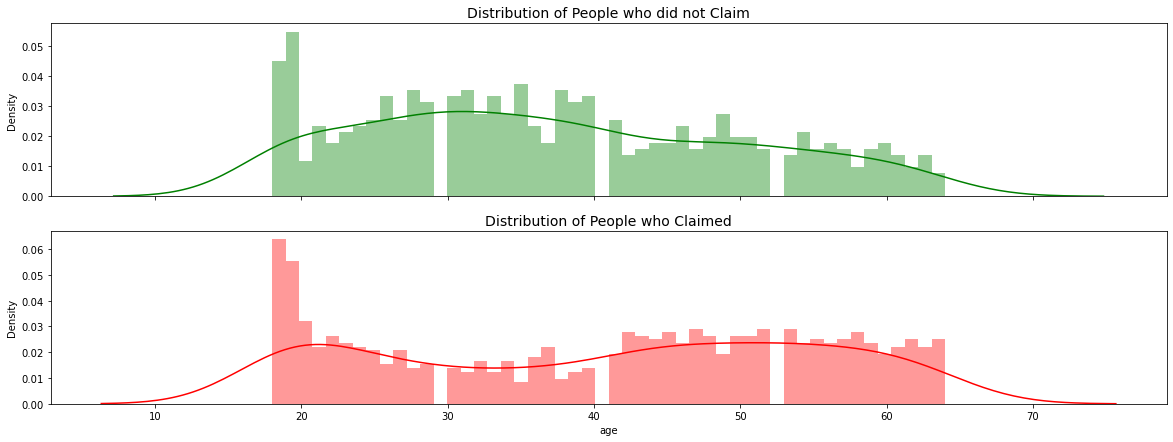

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Slicing data with not clamed
not_claimed = df['age'][df['insuranceclaim'] == 0]

# Slicing data with clamed
claimed = df['age'][df['insuranceclaim'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 7))
sns.distplot(a=not_claimed, bins=50, ax=ax1, color='green')
ax1.set_title(label='Distribution of People who did not Claim', size=14)
ax1.set_xlabel(xlabel='')
sns.distplot(a=claimed, bins=50, ax=ax2, color='red')
ax2.set_title(label='Distribution of People who Claimed', size=14)
plt.show()


In [18]:
print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

                                     Features Distribution                                      


NameError: name 'features' is not defined

In [19]:
g=sns.pairplot(df, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

NameError: name 'target' is not defined

<h2>Feature Selection<h2>

Text(0.5, 1.0, 'Correlation between features')

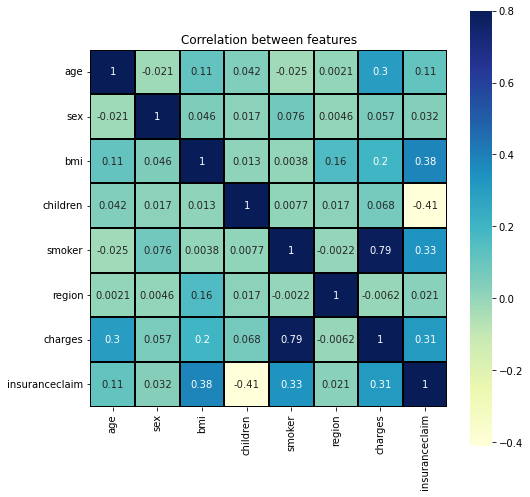

In [20]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Observation:

<br>Children are Insuranceclame are negatively corelated with Claim.<br>
Smoker and Charges are positively coorelated with clam.

<h2>Data Prepration<h2>

In [21]:
x = df.drop('insuranceclaim',axis = 1)
y = df['insuranceclaim']

In [22]:
x.shape

(1338, 7)

In [23]:
y.shape

(1338,)

In [24]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [25]:
y.

SyntaxError: invalid syntax (Temp/ipykernel_15672/927355991.py, line 1)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123, stratify = y)

print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (1204, 7) (1204,)
Testing Data Shape: (134, 7) (134,)


<h2>Applying the Model<h2>

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logreg.classes_

array([0, 1], dtype=int64)

In [29]:
logreg.coef_

array([[ 9.74516780e-04, -9.44097651e-01,  1.71763901e-01,
        -1.31637567e+00,  2.37778892e+00,  1.42495497e-01,
         4.91419480e-05]])

In [30]:
logreg.intercept_

array([-4.00393843])

In [31]:
logreg.score(x_test,y_test)

0.8432835820895522

In [32]:
#predicting on train data
y_pred_train = logreg.predict(x_train)

In [33]:
#predicting on test data
y_pred_test = logreg.predict(x_test)

In [34]:
y_pred_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
confusion_matrix.index = ['Positive','Negative']
confusion_matrix.columns = ['Positive','Negative']
print(confusion_matrix)

          Positive  Negative
Positive        42        14
Negative         7        71


In [36]:
from sklearn.metrics import confusion_matrix as cm
conf_matrix_train = cm(y_train, y_pred_train)

confusion_df_train = pd.DataFrame(conf_matrix_train, index=['Positive', 'Negative'], columns=['Positive', 'Negative'])

print(confusion_df_train)


          Positive  Negative
Positive       378       121
Negative        92       613


In [37]:
logreg.score(x_test,y_test)

0.8432835820895522

In [38]:
print('Accuracy score for test data is:', logreg.score(x_test,y_test))

Accuracy score for test data is: 0.8432835820895522


In [39]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy on the training set:", accuracy_train)


Accuracy on the training set: 0.8230897009966778


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameters you want to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']  # Optimization algorithm
}

# Create an instance of logistic regression
logreg = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)

# Calculate accuracy score on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set:", accuracy_test)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch

C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best Hyperparameters: {'C': 100, 'solver': 'newton-cg'}
Best Accuracy Score: 0.8804253112033195
Accuracy on the test set: 0.9104477611940298


In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        56
           1       0.91      0.94      0.92        78

    accuracy                           0.91       134
   macro avg       0.91      0.91      0.91       134
weighted avg       0.91      0.91      0.91       134



In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [44]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("insurance2.csv")

# Split the dataset
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)

# SVM
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# Evaluation
models = ['Logistic Regression', 'Decision Tree', 'SVM']
preds = [y_pred_logreg, y_pred_dtree, y_pred_svm]

for model, y_pred in zip(models, preds):
    print(f"{model} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Summary Table
results = pd.DataFrame({
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_dtree),
                 accuracy_score(y_test, y_pred_svm)]
})

print(results)


Logistic Regression Accuracy: 0.8208955223880597
Confusion Matrix:
[[44 15]
 [ 9 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        59
           1       0.81      0.88      0.85        75

    accuracy                           0.82       134
   macro avg       0.82      0.81      0.82       134
weighted avg       0.82      0.82      0.82       134


Decision Tree Accuracy: 0.9626865671641791
Confusion Matrix:
[[55  4]
 [ 1 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.95      0.99      0.97        75

    accuracy                           0.96       134
   macro avg       0.97      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134


SVM Accuracy: 0.664179104477612
Confusion Matrix:
[[45 14]
 [31 44]]
Classification Report:
              precision    recall  f1-sc

In [47]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already loaded and preprocessed your data into the DataFrame 'df'
# Splitting the dataset into features and target variable
X = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initializing the models
logreg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
svm_model = SVC()

# Training the models
logreg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {accuracy:.2f}')
    report = classification_report(y_test, y_pred, target_names=['Not Claimed', 'Claimed'])
    print(f'Classification Report for {model_name}:')
    print(report)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Precision of {model_name}: {precision:.2f}')
    print(f'Recall of {model_name}: {recall:.2f}')
    print(f'F1 Score of {model_name}: {f1:.2f}')
    print('-' * 50)

# Evaluating the models
evaluate_model(y_test, y_pred_logreg, 'Logistic Regression')
evaluate_model(y_test, y_pred_tree, 'Decision Tree')
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')


Accuracy of Logistic Regression: 0.82
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

 Not Claimed       0.83      0.75      0.79        59
     Claimed       0.81      0.88      0.85        75

    accuracy                           0.82       134
   macro avg       0.82      0.81      0.82       134
weighted avg       0.82      0.82      0.82       134

Precision of Logistic Regression: 0.81
Recall of Logistic Regression: 0.88
F1 Score of Logistic Regression: 0.85
--------------------------------------------------
Accuracy of Decision Tree: 0.96
Classification Report for Decision Tree:
              precision    recall  f1-score   support

 Not Claimed       0.98      0.92      0.95        59
     Claimed       0.94      0.99      0.96        75

    accuracy                           0.96       134
   macro avg       0.96      0.95      0.95       134
weighted avg       0.96      0.96      0.96       134

Precision of Decision Tr